In [11]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import matplotlib.pyplot as plt
import numpy as np
import datetime

plt.rcParams["figure.figsize"] = (15,5)

In [12]:
# init FTDI device
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6)
# reload configuration (optional step - just to fill BRAM (DACGAIN registers) with initial values)
fpga.reload()
# reset fpga
fpga.reset()

In [13]:
fpga.set_pulseform(initDelay=5, POn=16, PInter=16, Poff=5000)
gain = [int(100 + ((1000-100)*x*x*x/32/32/32)) for x in range(32)]

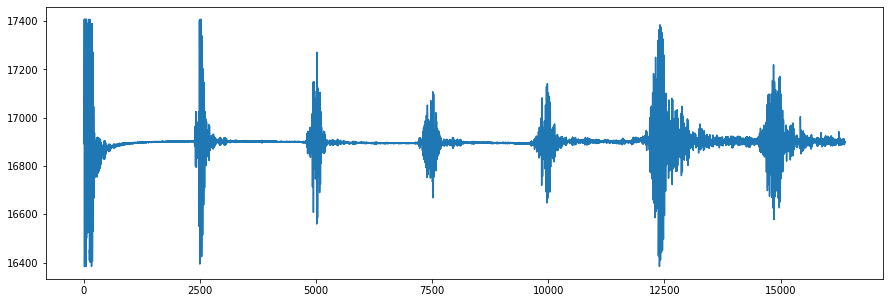

In [14]:
acq_res = fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=True) 

plt.plot(acq_res[0])

In [15]:
x, t = fpga.rawAcq(acq_res)

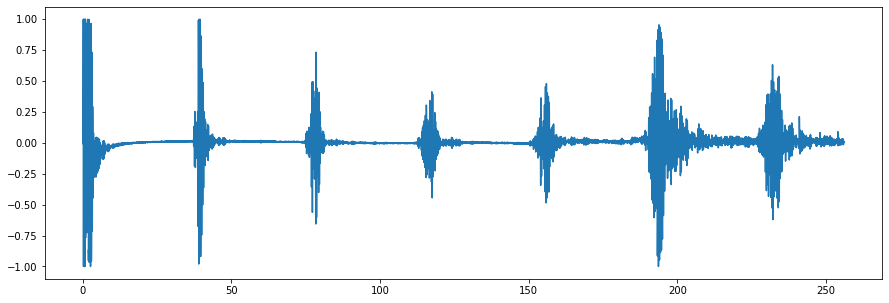

In [17]:
plt.plot(t,x[0])

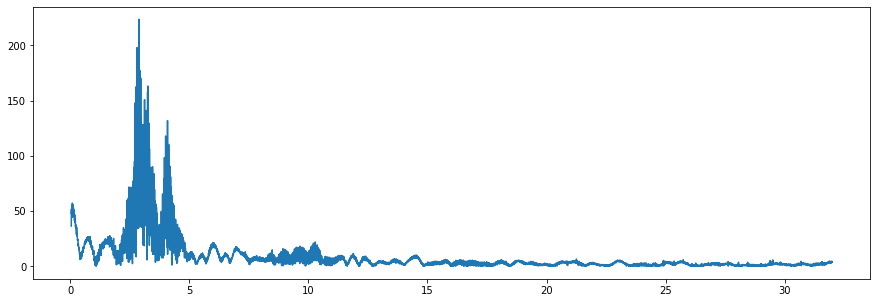

In [18]:
f = [k*64/len(x[0]) for k in range(len(x[0]))]
FFT = np.abs(np.fft.fft(x[0]))
plt.plot(f[10:len(FFT)//2],FFT[10:len(FFT)//2])

In [19]:
range(len(x[0]))

range(0, 16384)